In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
from platform import python_version

print(python_version())

3.8.5


## Functions

In [3]:
# saving file do not show labels
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 'normal'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (7, 5)
# plt.rc('font', **font)

def draw_and_save_one_line_graph(x, xlabel, ylabel, title, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
#     axes.set_title(title, **font)
    sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('graph/' + output_name.replace(' ', '_') + '.svg', bbox_inches='tight')
        
def draw_and_save_one_line_graph_points(x, xlabel, ylabel, title, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
#     axes.set_title(title, **font)
    sns.pointplot(x=x_data, ax=axes, y=x)
    #     sns.lineplot(x=x_data, ax = axes, y=x)
    #     plt.legend(loc = 'best')
    #     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('graph/' + output_name.replace(' ', '_') + '.svg', bbox_inches='tight')


def draw_and_save_three_lines_graph(x, y, z, xlabel, ylabel, title, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
#     axes.set_title(title, **font)
    sns.lineplot(x=x_data, ax = axes, y=x, label = 'Normal strategy')    
    sns.lineplot(x=x_data, ax = axes, y=y, label = 'Call by name strategy')
    sns.lineplot(x=x_data, ax = axes, y=z, label = 'Call by value strategy')
    plt.legend(loc = 'best')
    plt.legend(prop=font)
    
    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('graph/' + output_name.replace(' ', '_') + '.svg', bbox_inches='tight')

## REMOVE

In [7]:
norm_df[norm_df['has_normal_form'] & val_df['has_normal_form'] & name_df['has_normal_form'] &
        (norm_df['size_reduced'] != val_df['size_reduced']) & 
        (val_df['size_reduced'] != name_df['size_reduced']) & 
        (norm_df['size_reduced'] != name_df['size_reduced'])]

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form,is_same_norm,is_same_val,is_same_name
1200,7,43040,3.0,7.0,1.0,False,False,True,True,False,False
1214,7,43054,4.0,8.0,2.0,False,False,True,True,False,False
1248,7,43088,5.0,11.0,3.0,False,False,True,True,False,False
8010,8,444904,3.0,8.0,2.0,False,False,True,True,False,False
8011,8,444905,3.0,8.0,2.0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16937638,11,851360846,5.0,11.0,2.0,False,False,True,True,False,False
16937641,11,851360849,6.0,11.0,2.0,False,False,True,True,False,False
16937644,11,851360852,5.0,11.0,2.0,False,False,True,True,False,False
16937653,11,851360861,5.0,11.0,2.0,False,False,True,True,False,False


## Experiment's data loading

In [3]:
norm_df = pd.read_csv('normal_strat.csv')
val_df = pd.read_csv('call_by_value.csv')
name_df = pd.read_csv('call_by_name.csv')

In [5]:
print(norm_df.shape, val_df.shape, name_df.shape)

(16945559, 11) (16945559, 11) (16945559, 11)


In [5]:
normal_forms_df = pd.read_csv('normal_form_ratios.csv')

In [7]:
normal_forms_df.shape

(69445532, 8)

In [8]:
norm_df.sample(5)

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form,is_same_norm,is_same_val,is_same_name
2661932,11,837085140,2.0,11.0,7.0,False,False,True,True,False,False
11649873,11,846073081,3.0,15.0,1.0,False,False,True,True,True,True
1041221,10,63266775,2.0,10.0,4.0,False,False,True,True,False,False
12113697,11,846536905,2.0,11.0,5.0,False,False,True,True,False,False
937665,10,63163219,1.0,10.0,8.0,False,False,True,True,True,True


In [9]:
normal_forms_df.sample(5)

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form
6612371,10,949251,1.0,10.0,7.0,False,False,True
68437845,10,62774725,1.0,10.0,8.0,False,False,True
68244058,10,62580938,1.0,10.0,8.0,False,False,True
29551854,10,23888734,1.0,10.0,6.0,False,False,True
43901152,10,38238032,2.0,10.0,6.0,False,False,True


# 1. Normal forms analysis

In this section we beta-reduce all possible closed terms with sizes ∈ [1;10] using normal strategy, which finds normal form if term has one according to standartization theorem. 

### 1. Ratio of terms being in normal form among all terms

In [6]:
1 - normal_forms_df[normal_forms_df['steps_count'] == 0].shape[0] / normal_forms_df.shape[0]

0.6401636033258411

In [7]:
precent_terms_in_nf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    precent_terms_in_nf[term_size - 1] = normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] == 0)].shape[0] / normal_forms_df[normal_forms_df['size_of_term'] == term_size].shape[0]

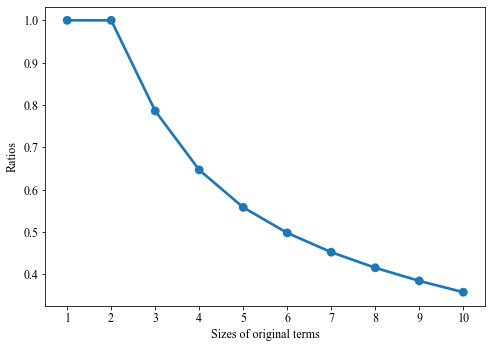

In [8]:
draw_and_save_one_line_graph_points(precent_terms_in_nf,
                               "Sizes of original terms", "Ratios", "Ratio of terms being in normal form among all terms",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Ratio of terms being in normal form among all terms")

### 2. Average length of reduction chains among all terms having normal form

If term has a sequence of beta-reductions, which lead to term's normal form, we'll call this sequence a **reduction chain**.

In [9]:
average_len = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['steps_count'])    

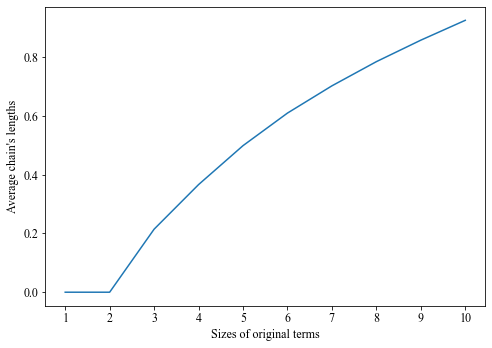

In [10]:
draw_and_save_one_line_graph(average_len,
                               "Sizes of original terms", "Average chain's lengths", 
                             "Average length of reduction chains among all terms having normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average length of reduction chains among all terms having normal form")

### 3. Average length of reduction chains among all terms having normal form excluding terms being already in normal form

In [11]:
average_len_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] != 0)]['steps_count'])  

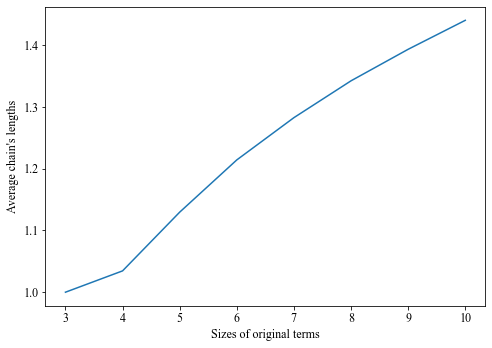

In [12]:
draw_and_save_one_line_graph(average_len_notinnf,
                               "Sizes of original terms", "Average chain's lengths", 
                             "Average length of reduction chains among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average length of reduction chains among all terms having normal form excluding terms being already in normal form")

Distribution of reductions chains lengths among terms of size 10

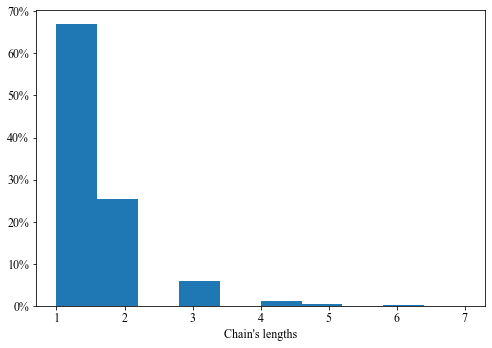

In [13]:
length_to_skip = 20000
data_1 = normal_forms_df[(normal_forms_df['has_normal_form'] == True) &(normal_forms_df['steps_count'] != 0)
               &(normal_forms_df['size_of_term'] == 10)]
info = data_1.steps_count.value_counts() > length_to_skip
dict_info = info.to_dict()
data_filtered = data_1[data_1['steps_count'].map(dict_info)]
data_filtered['steps_count'].value_counts()
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
plt.hist(x=data_filtered['steps_count'], weights=np.ones(len(data_filtered['steps_count'])) / len(data_filtered['steps_count']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Chain's lengths", **font)
plt.tight_layout()
plt.savefig('graph/normal_forms/' + 'Steps_count_distrib' + '.svg', bbox_inches='tight')
plt.show()

### 4. Average size of reduced terms among all terms having normal form

Size of term defines due to article

In [14]:
average_reduced_size = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['size_reduced'])   

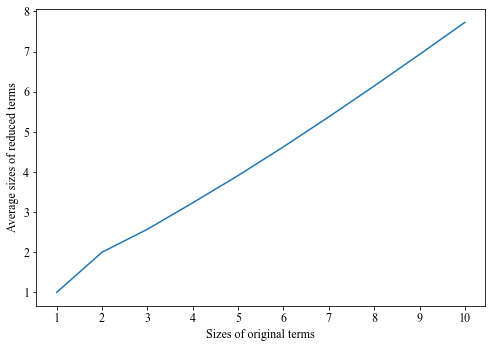

In [15]:
draw_and_save_one_line_graph(average_reduced_size,
                               "Sizes of original terms", "Average sizes of reduced terms",
                             "Average size of reduced terms among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average size of reduced terms among all terms having normal form")

### 5. Average size of reduced terms among all terms having normal form excluding terms being already in normal form

In [16]:
average_reduced_size_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_reduced']) 

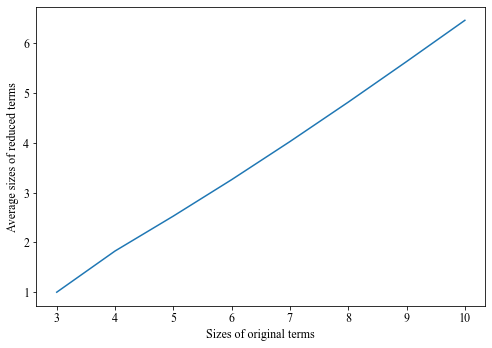

In [17]:
draw_and_save_one_line_graph(average_reduced_size_notinnf,
                               "Sizes of original terms", "Average sizes of reduced terms",
                             "Average size of reduced terms among all terms having normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average size of reduced terms among all terms having normal form excluding terms being already in normal form")

### 6. Average max term's size during reduction among all terms having normal form excluding terms being already in normal form

In [18]:
average_maxsize_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_maxsize_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_biggest_term_in_steps'])   

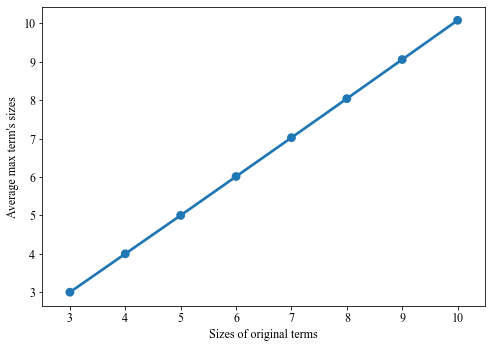

In [19]:
draw_and_save_one_line_graph_points(average_maxsize_notinnf[2:],
                               "Sizes of original terms", "Average max term's sizes", 
                                    "Average max term's size during reduction among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "normal_forms/Average max term's size during reduction among all terms having normal form excluding terms being already in normal form")

### 7. Ratio of max term's size during reduction to the original term's size among all terms having normal form excluding terms being already in normal form

In [20]:
size_ratio_full_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    size_ratio_full_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_biggest_term_in_steps'] /
                                                      normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_of_term'])

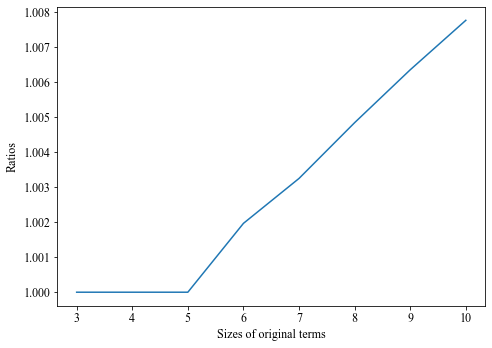

In [21]:
draw_and_save_one_line_graph(size_ratio_full_notinnf,
                              "Sizes of original terms", "Ratios",
                             "Ratio of max term's size during reduction to the original term's size among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Ratio of max term's size during reduction to the original term's size among all terms having normal form excluding terms being already in normal form")

### 8. Ratio of "increasing" terms among all terms having no normal form

In [22]:
cnt_to_skip = 4
precent_increasing_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_increasing_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['increasing_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])

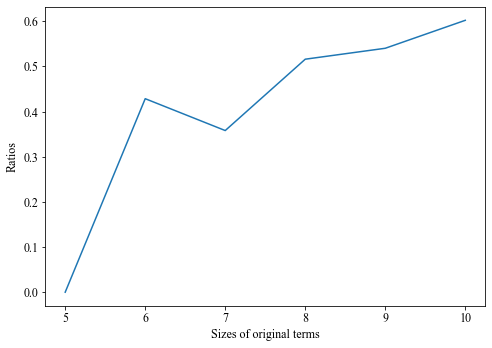

In [23]:
draw_and_save_one_line_graph(precent_increasing_full,                             
                              "Sizes of original terms", "Ratios",
                             " Ratio of \"increasing\" terms among all terms having no normal form",     
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "normal_forms/Ratio of increasing terms among all terms having no normal form")

### 9. Ratio of "looping" terms among all terms having no normal form

In [24]:
precent_cycled_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()) - cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_cycled_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['cycled_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])

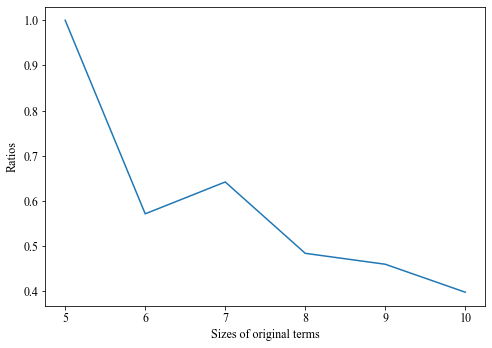

In [25]:
draw_and_save_one_line_graph(precent_cycled_full,                             
                              "Sizes of original terms", "Ratios",
                             " Ratio of \"looping\" terms among all terms having no normal form",     
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                             "normal_forms/Ratio of looping terms among all terms having no normal form")

# 2. Different reduction strategies comparing

In this section we compare results of beta-reducing in different strategies such as:
1. Normal strategy.
2. Call by name strategy.
3. Call by value strategy.

We take all possible closed terms with sizes ∈ [1;11], which ARE NOT abstractions. This is due to fact that Call by Name strategy and Call by Value don't go "under" lambda-abstractions, so those terms are not really informative for research.

### 1. Average length of reduction chains among all terms having normal form for each strategy

In [26]:
average_len_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len_norm[term_size - 3] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['steps_count'])
    average_len_name[term_size - 3] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['steps_count'])
    average_len_val[term_size - 3] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['steps_count'])

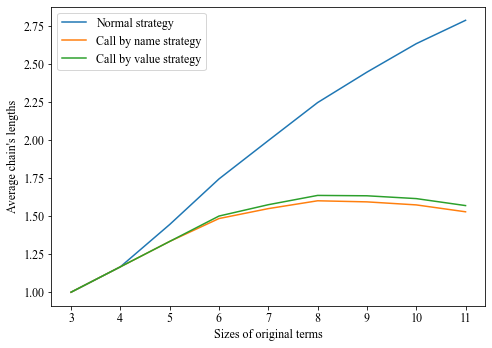

In [27]:
draw_and_save_three_lines_graph(average_len_norm, average_len_name, average_len_val,
                                 "Sizes of original terms", "Average chain's lengths", 
                             "Average length of reduction chains among all terms having normal form for each strategy",
                                norm_df['size_of_term'].unique(),
                               "strategies/Average length of reduction chains among all terms having normal form for each strategy")

### 2. Average length of reduction chains where normal forms in each strategies are equal

In [28]:
average_len2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len2_norm[term_size - 3] = np.mean(norm_df[(norm_df['size_of_term'] == term_size)
                                                       &(norm_df['has_normal_form'] == True)
                                                       &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['steps_count'])
    
    average_len2_name[term_size - 3] = np.mean(name_df[(name_df['size_of_term'] == term_size)
                                                       &(name_df['has_normal_form'] == True)
                                                       &(name_df['is_same_norm'] == True)
                                                       &(name_df['is_same_val'] == True)
                                                       &(name_df['is_same_name'] == True)]['steps_count'])
    
    average_len2_val[term_size - 3] = np.mean(val_df[(val_df['size_of_term'] == term_size)
                                                       &(val_df['has_normal_form'] == True)
                                                       &(val_df['is_same_norm'] == True)
                                                       &(val_df['is_same_val'] == True)
                                                       &(val_df['is_same_name'] == True)]['steps_count'])

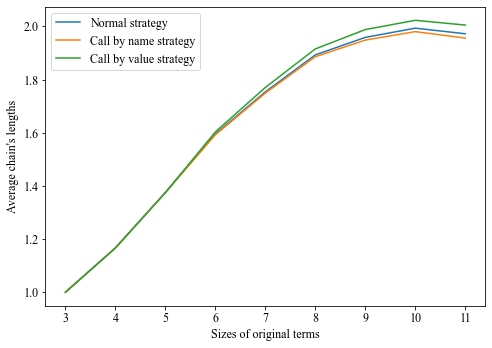

In [29]:
draw_and_save_three_lines_graph(average_len2_norm, average_len2_name, average_len2_val,
                                "Sizes of original terms", "Average chain's lengths", 
                             "Average length of reduction chains where normal forms in each strategies are equal",
                                norm_df['size_of_term'].unique(),
                               "strategies/Average length of reduction chains where normal forms in each strategies are equal")

 ### 3. Average size of reduced terms among all terms having normal form for each strategy

In [33]:
average_size_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_size_norm[term_size - 3] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_reduced'])
    average_size_name[term_size - 3] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_reduced'])
    average_size_val[term_size - 3] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_reduced'])

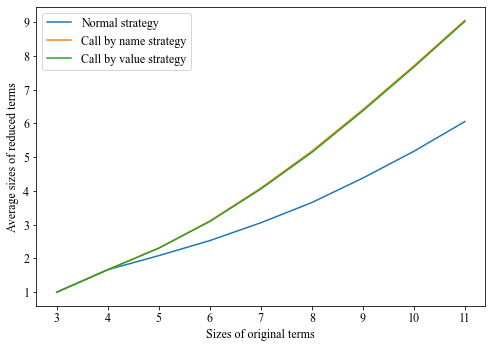

In [34]:
draw_and_save_three_lines_graph(average_size_norm, average_size_name, average_size_val,
                                "Sizes of original terms", "Average sizes of reduced terms", 
                             "Average size of reduced terms among all terms having normal form for each strategy",
                                norm_df['size_of_term'].unique(),
                               "strategies/Average size of reduced terms among all terms having normal form for each strategy")

### 4. Average max term's size during reduction among all terms for each strategy

In [36]:
average_maxsize_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_maxsize_norm[term_size - 3] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    average_maxsize_name[term_size - 3] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    average_maxsize_val[term_size - 3] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])

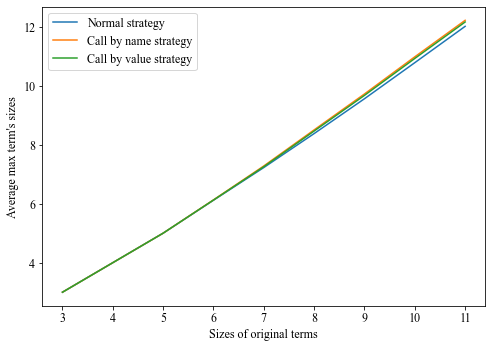

In [37]:
draw_and_save_three_lines_graph(average_maxsize_norm, average_maxsize_name, average_maxsize_val,
                                "Sizes of original terms", "Average max term's sizes", 
                             "Average max term's size during reduction among all terms for each strategy",
                                norm_df['size_of_term'].unique(),
                               "strategies/Average max term's size during reduction among all terms for each strategy")

### 5.  Average max term's size during reduction among all terms where normal forms are equal in each strategy

In [39]:
average_maxsize2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_maxsize2_norm[term_size - 3] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                          &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    average_maxsize2_name[term_size - 3] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                          &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    average_maxsize2_val[term_size - 3] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)&(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])

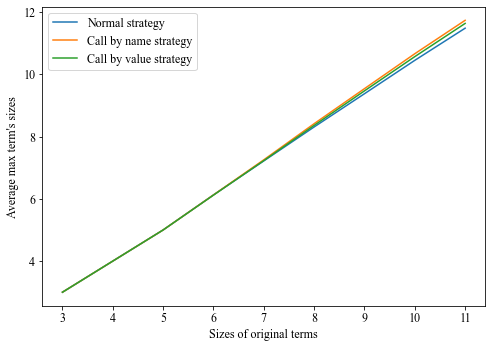

In [40]:
draw_and_save_three_lines_graph(average_maxsize2_norm, average_maxsize2_name, average_maxsize2_val,
                                "Sizes of original terms", "Average max term's sizes", 
                             "Average max term's size during reduction among all terms where normal forms are equal in each strategy",
                                norm_df['size_of_term'].unique(),
                               "strategies/Average max term's size during reduction among all terms where normal forms are equal in each strategy")

### 6. Ratio of terms which normal form is equal in each strategy / each pair of strategies

In [42]:
precent_all_same = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_norm_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_norm_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_val_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    cnt_all_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)].shape[0]
    
    precent_all_same[term_size - 3] = cnt_all_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]
    
    cnt_norm_val_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)].shape[0]
    
    precent_norm_val[term_size - 3] = cnt_norm_val_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]    
    
    
    cnt_norm_name_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_name'] == True)].shape[0]
    
    precent_norm_name[term_size - 3] = cnt_norm_name_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]    
    
    
    cnt_val_name_same =  val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                     &(val_df['is_same_name'] == True)
                                                       &(val_df['is_same_val'] == True)].shape[0]
    
    precent_val_name[term_size - 3] = cnt_val_name_same / val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)].shape[0]    
    
   
    

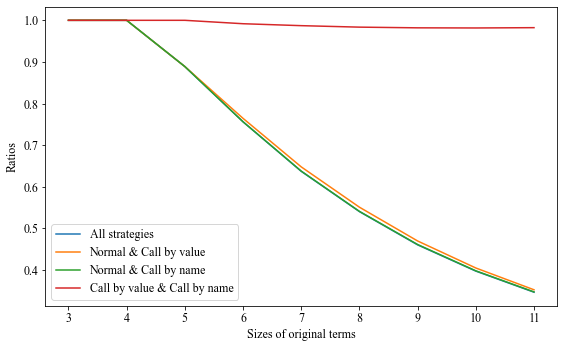

In [44]:
fig, axes = plt.subplots(ncols=1,nrows=1, figsize = (8, 5))
axes.set_xticks(norm_df['size_of_term'].unique())
axes.set_xlabel('Sizes of original terms', **font)
axes.set_ylabel('Ratios', **font)
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_all_same, label = 'All strategies')    
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_norm_val, label = 'Normal & Call by value')
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_norm_name, label = 'Normal & Call by name')
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_val_name, label = 'Call by value & Call by name')
plt.legend(loc = 'best')
plt.legend(prop=font)

fig.tight_layout()
fig.savefig('graph/strategies/Ratio_of_terms_which_normal_form_is_equal_in_each_strategy' + '.svg', bbox_inches='tight')

### 7. Ratio of terms having no normal form in each strategy

In [45]:
precent_no_nf_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_no_nf_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_no_nf_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    precent_no_nf_norm[term_size-3] =  (norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == False)].shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size)].shape[0])
    
    precent_no_nf_val[term_size-3] =  (val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == False)].shape[0]) / (val_df[(val_df['size_of_term'] == term_size)].shape[0])
  

    precent_no_nf_name[term_size-3] =  (name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == False)].shape[0]) / (name_df[(norm_df['size_of_term'] == term_size)].shape[0])

    

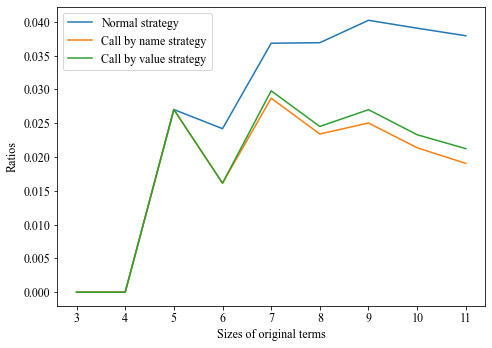

In [46]:
draw_and_save_three_lines_graph(precent_no_nf_norm, precent_no_nf_name, precent_no_nf_val,
                                "Sizes of original terms", "Ratios", 
                             "Ratio of terms having no normal form in each strategy",
                                norm_df['size_of_term'].unique(),
                               "strategies/Ratio of terms having no normal form in each strategy")

### 8. Ratio of "increasing" terms among all terms having no normal form in each strategy

In [67]:
cnt_to_skip = 4
precent_increase_val = np.zeros(shape = 11 - cnt_to_skip, dtype=float)
precent_increase_norm = np.zeros(shape = 11 - cnt_to_skip, dtype=float)
precent_increase_name = np.zeros(shape = 11 - cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, 11):
    precent_increase_norm[term_size - cnt_to_skip] =  (norm_df[(norm_df['size_of_term'] == term_size + 1) &
                                                  (norm_df['has_normal_form'] == False)
                                                     &(norm_df['increasing_reduction'] == True)].shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(norm_df['has_normal_form'] == False)].shape[0])
    
    precent_increase_val[term_size - cnt_to_skip] =  (val_df[(val_df['size_of_term'] == term_size + 1) &
                                                  (val_df['has_normal_form'] == False)
                                                     &(val_df['increasing_reduction'] == True)].shape[0]) / (val_df[(val_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(val_df['has_normal_form'] == False)].shape[0])
    
    precent_increase_name[term_size - cnt_to_skip] =  (name_df[(name_df['size_of_term'] == term_size + 1) &
                                                  (name_df['has_normal_form'] == False)
                                                     &(name_df['increasing_reduction'] == True)].shape[0]) / (name_df[(name_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(name_df['has_normal_form'] == False)].shape[0])
   
    

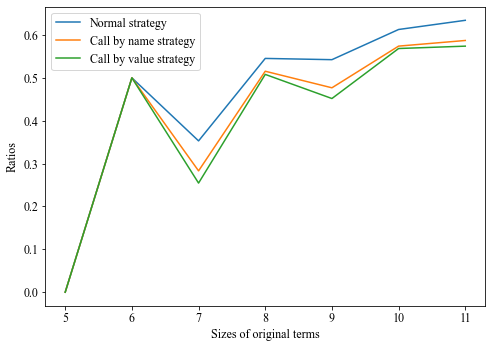

In [75]:
draw_and_save_three_lines_graph(precent_increase_norm, precent_increase_name, precent_increase_val,
                                 "Sizes of original terms", "Ratios",
                             "Ratio of \"increasing\" terms among all terms having no normal form in each strategy",
                                norm_df['size_of_term'].unique()[2:],
                               "strategies/Ratio of increasing terms among all terms having no normal form in each strategy")

### 9. Ratio of "looping" terms among all terms having no normal form in each strategy

In [76]:
cnt_to_skip = 4
precent_cycled_val = np.zeros(shape = 11- cnt_to_skip, dtype=float)
precent_cycled_norm = np.zeros(shape = 11 - cnt_to_skip, dtype=float)
precent_cycled_name = np.zeros(shape = 11 - cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, 11):
    precent_cycled_norm[term_size - cnt_to_skip] =  (norm_df[(norm_df['size_of_term'] == term_size + 1) &
                                                  (norm_df['has_normal_form'] == False)
                                                     &(norm_df['cycled_reduction'] == True)]
                                                     .shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size + 1)
                                                                           &(norm_df['has_normal_form'] == False)].shape[0])
    
    precent_cycled_val[term_size - cnt_to_skip] =  (val_df[(val_df['size_of_term'] == term_size + 1) &
                                                  (val_df['has_normal_form'] == False)
                                                     &(val_df['cycled_reduction'] == True)]
                                                    .shape[0]) / (val_df[(val_df['size_of_term'] == term_size + 1)
                                                                         &(val_df['has_normal_form'] == False)].shape[0])
    
    precent_cycled_name[term_size - cnt_to_skip] =  ( name_df[(name_df['size_of_term'] == term_size + 1) &
                                                  (name_df['has_normal_form'] == False)
                                                     &(name_df['cycled_reduction'] == True)].
                                                     shape[0]) / (name_df[(name_df['size_of_term'] == term_size + 1)
                                                                          &(name_df['has_normal_form'] == False)].shape[0])
   
    

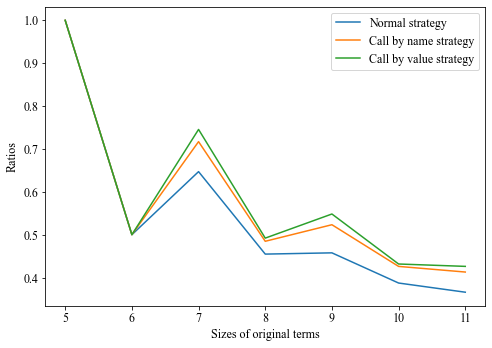

In [77]:
draw_and_save_three_lines_graph(precent_cycled_norm, precent_cycled_name, precent_cycled_val,
                               "Sizes of original terms", "Ratios",
                             "Ratio of \"looping\" terms among all terms having no normal form in each strategy",
                                norm_df['size_of_term'].unique()[2:],
                               "strategies/Ratio of looping terms among all terms having no normal form in each strategy")